In [64]:
# Import necessary libraries for data analysis and preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [65]:
# Read data
satisfaction_data = pd.read_csv("C:/Users/nalre/Downloads/model.csv")

# Remove data that hold no value for analysis
del satisfaction_data['Unnamed: 0']
del satisfaction_data['id']


# View data
satisfaction_data.head()

,Gender,Customer Type,Age,Price,NewUsed,Category,Product description accuracy,Manufacturer sustainability,Packaging quality,Additional options,Helpfulness of reviews and ratings,Integrity of packaging,Ease check-out procedure,Relevance of related products,Costumer insurance,Shipping delay in days,Arrival delay in days,Satisfaction
0,Female,Premium,60.0,37.66,New,Entertainment,4,4,2,4,3,5,3,4,2,0,0,Not Satisfied
1,Female,Premium,57.0,331.90,New,Technology,1,1,3,5,5,5,4,5,5,0,0,Satisfied
2,Female,Premium,38.0,311.06,New,Technology,3,3,5,5,5,4,1,5,5,0,0,Satisfied
3,Male,Premium,NaN,85.14,New,Technology,5,5,3,2,5,4,5,1,3,0,0,Not Satisfied
4,Male,Premium,37.0,23.15,New,Entertainment,1,1,5,1,3,3,2,2,5,0,0,Satisfied


In [66]:
# Convert 'Satisfaction' to binary 0 = Not satisfied, 1 = Satiasfied
satisfaction_dummy = pd.get_dummies(satisfaction_data[['Satisfaction']],drop_first=True) 

# Concatenate our knew Satisfaction_Satisfied column with original dataset
satisfaction_data = pd.concat([satisfaction_data,satisfaction_dummy], axis = 1)

# Delete string version of 'Satisfaction'
del satisfaction_data['Satisfaction']

satisfaction_data.head()


,Gender,Customer Type,Age,Price,NewUsed,Category,Product description accuracy,Manufacturer sustainability,Packaging quality,Additional options,Helpfulness of reviews and ratings,Integrity of packaging,Ease check-out procedure,Relevance of related products,Costumer insurance,Shipping delay in days,Arrival delay in days,Satisfaction_Satisfied
0,Female,Premium,60.0,37.66,New,Entertainment,4,4,2,4,3,5,3,4,2,0,0,0
1,Female,Premium,57.0,331.90,New,Technology,1,1,3,5,5,5,4,5,5,0,0,1
2,Female,Premium,38.0,311.06,New,Technology,3,3,5,5,5,4,1,5,5,0,0,1
3,Male,Premium,NaN,85.14,New,Technology,5,5,3,2,5,4,5,1,3,0,0,0
4,Male,Premium,37.0,23.15,New,Entertainment,1,1,5,1,3,3,2,2,5,0,0,1


In [67]:
# Check for NA's. We can see 'Age' contains just under 4000 NA values
satisfaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 18 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Gender                              50000 non-null  object 
 1   Customer Type                       50000 non-null  object 
 2   Age                                 46132 non-null  float64
 3   Price                               50000 non-null  float64
 4   NewUsed                             50000 non-null  object 
 5   Category                            50000 non-null  object 
 6   Product description accuracy        50000 non-null  int64  
 7   Manufacturer sustainability         50000 non-null  int64  
 8   Packaging quality                   50000 non-null  int64  
 9   Additional options                  50000 non-null  int64  
 10  Helpfulness of reviews and ratings  50000 non-null  int64  
 11  Integrity of packaging              50000

In [68]:
# Visualize distribution of 'Age'. If normal, NA's replaced with mean of column, if not, median.
#plt.hist(satisfaction_data['Age'])

In [69]:
# Replace NA's with Median
satisfaction_data['Age'] = satisfaction_data['Age'].fillna(satisfaction_data['Age'].median())

In [70]:
# Convert categorical variable into dummy/indicator variables
dummy = pd.get_dummies(satisfaction_data[['Category', 'Gender', 'Customer Type', 'NewUsed']],drop_first=True) 

# Delete original variables
del satisfaction_data['Gender']
del satisfaction_data['Customer Type']
del satisfaction_data['Category']
del satisfaction_data['NewUsed']
dummy.head()

,Category_Home/Kitchen,Category_Other,Category_Sport,Category_Technology,Gender_Male,Customer Type_Premium,NewUsed_Used
0,0,0,0,0,0,1,0
1,0,0,0,1,0,1,0
2,0,0,0,1,0,1,0
3,0,0,0,1,1,1,0
4,0,0,0,0,1,1,0


In [71]:
# See if any variables are highly correlated
corr = satisfaction_data.corr()
corr.style.background_gradient(cmap='coolwarm')

,Age,Price,Product description accuracy,Manufacturer sustainability,Packaging quality,Additional options,Helpfulness of reviews and ratings,Integrity of packaging,Ease check-out procedure,Relevance of related products,Costumer insurance,Shipping delay in days,Arrival delay in days,Satisfaction_Satisfied
Age,1.000000,0.067763,0.072432,-0.005976,0.004265,0.042142,0.022955,-0.050634,0.031796,-0.057663,0.030428,-0.006100,-0.007097,0.067679
Price,0.067763,1.000000,-0.019277,0.005269,0.058271,0.102824,0.130541,0.057377,0.071740,0.051371,0.090924,0.000792,-0.004283,0.296264
Product description accuracy,0.072432,-0.019277,1.000000,0.437311,-0.002496,0.067664,0.009877,0.075810,0.095327,0.073663,0.010525,0.003346,0.004921,-0.052484
Manufacturer sustainability,-0.005976,0.005269,0.437311,1.000000,-0.007679,-0.028670,-0.008536,0.003499,-0.034978,-0.001626,-0.010219,0.009250,0.007654,0.000245
Packaging quality,0.004265,0.058271,-0.002496,-0.007679,1.000000,0.061749,0.035868,0.039317,0.094048,0.039209,0.665677,-0.023831,-0.024498,0.215388
Additional options,0.042142,0.102824,0.067664,-0.028670,0.061749,1.000000,0.348413,0.518978,0.249357,0.546975,0.125633,-0.026503,-0.028985,0.317440
Helpfulness of reviews and ratings,0.022955,0.130541,0.009877,-0.008536,0.035868,0.348413,1.000000,0.366054,0.154166,0.361265,0.094119,0.016257,0.015532,0.312572
Integrity of packaging,-0.050634,0.057377,0.075810,0.003499,0.039317,0.518978,0.366054,1.000000,0.239617,0.626156,0.100992,-0.004986,-0.005427,0.247086
Ease check-out procedure,0.031796,0.071740,0.095327,-0.034978,0.094048,0.249357,0.154166,0.239617,1.000000,0.240859,0.185308,-0.014833,-0.012196,0.241534
Relevance of related products,-0.057663,0.051371,0.073663,-0.001626,0.039209,0.546975,0.361265,0.626156,0.240859,1.000000,0.094470,-0.050672,-0.049509,0.245536


In [72]:
# 'Shipping delay in days' and 'Arrival Delay in Days' are strongly correlated
# It is adviseable to remove one as they both resemble eachother
# Using business knowledge, a delay in arrival creates more dissatisfaction than delay in shipping
del satisfaction_data['Shipping delay in days']

<AxesSubplot:>

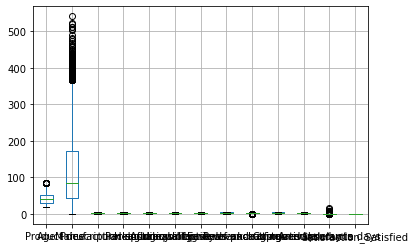

In [73]:
satisfaction_data.boxplot()

In [74]:
# We must scale since the satisfaction ratings are all the same, BUT, they differ from 'Age' and 'Price'

# Import scaler from sklearn
from sklearn.preprocessing import StandardScaler

# Create instance of StadardScaler
scaler = StandardScaler()

# Fit scaler to data
scaler.fit(satisfaction_data.drop('Satisfaction_Satisfied',axis=1))

StandardScaler()

In [75]:
# Transform all variables using the determined mean and variance
scaled_features = scaler.transform(satisfaction_data.drop('Satisfaction_Satisfied',axis=1))

# Convert to dataframe
scaled_features = pd.DataFrame(scaled_features,columns=satisfaction_data.columns[:-1])

# Concatenate our dummy variables with the scaled dataset because dummies did not need to be scaled
scaled_features = pd.concat([scaled_features,dummy], axis = 1)
scaled_features.head()

,Age,Price,Product description accuracy,Manufacturer sustainability,Packaging quality,Additional options,Helpfulness of reviews and ratings,Integrity of packaging,Ease check-out procedure,Relevance of related products,Costumer insurance,Arrival delay in days,Category_Home/Kitchen,Category_Other,Category_Sport,Category_Technology,Gender_Male,Customer Type_Premium,NewUsed_Used
0,1.418672,-0.813745,0.614787,0.800233,-0.893004,0.491497,-0.254818,1.167069,-0.237282,0.312945,-0.966122,-0.270382,0,0,0,0,0,1,0
1,1.187928,2.137670,-1.349641,-1.548603,-0.142870,1.267095,1.264399,1.167069,0.552238,1.163755,1.314009,-0.270382,0,0,0,1,0,1,0
2,-0.273452,1.928631,-0.040022,0.017287,1.357397,1.267095,1.264399,0.320533,-1.816323,1.163755,1.314009,-0.270382,0,0,0,1,0,1,0
3,-0.042708,-0.337490,1.269597,1.583178,-0.142870,-1.059700,1.264399,0.320533,1.341758,-2.239485,-0.206078,-0.270382,0,0,0,1,1,1,0
4,-0.350367,-0.959289,-1.349641,-1.548603,1.357397,-1.835298,-0.254818,-0.526004,-1.026803,-1.388675,1.314009,-0.270382,0,0,0,0,1,1,0


<AxesSubplot:>

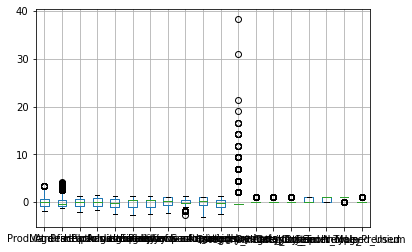

In [76]:
scaled_features.boxplot()

In [77]:
# Train test and split data for model fitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_features,satisfaction_data['Satisfaction_Satisfied'],
                                                    test_size=0.30)

In [78]:
# Use KNN model with K set to 3 to begin
from sklearn.neighbors import KNeighborsClassifier

# Create instance of KNN model
knn = KNeighborsClassifier(n_neighbors=3)

# Fit the model
knn.fit(X_train,y_train)

# Get predictions
pred = knn.predict(X_test)

# Observe results
from sklearn.metrics import classification_report,confusion_matrix
# 81% F1-Score. Let's see if we can improve
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      8872
           1       0.80      0.75      0.77      6128

    accuracy                           0.82     15000
   macro avg       0.82      0.81      0.81     15000
weighted avg       0.82      0.82      0.82     15000



In [44]:
# Create a loop that tests our model 40 times with 40 different K-values
# Allows to make an elbow plot to identify K value with lowest error rate

# Create empty list to store error rate
error_rate = []


for i in range(1,40):
    
    # 'i' represents the values in the given range to be tested for K
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    
    # After each iteration, append the error rate to the list
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

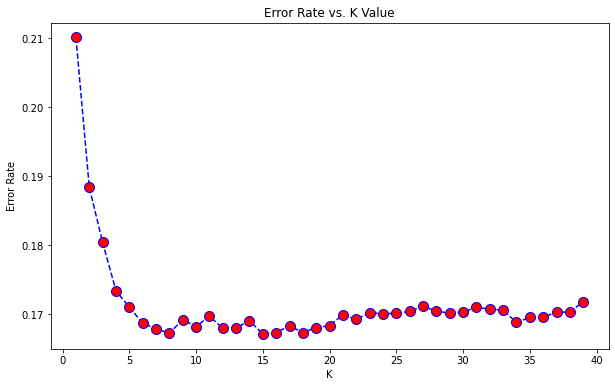

In [45]:
# Create elbow plot
# We want to see the K with the lowest Error Rate, while the rest of the K's don't show any more possible decline
# If consistant decline is seen, there is a chance a higher K value will result in a lower Error Rate
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [46]:
# Retrain model with K=8 lowest error rate
knn = KNeighborsClassifier(n_neighbors=12)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

# Gwt results
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

[[8060  758]
 [1761 4421]]


              precision    recall  f1-score   support

           0       0.82      0.91      0.86      8818
           1       0.85      0.72      0.78      6182

    accuracy                           0.83     15000
   macro avg       0.84      0.81      0.82     15000
weighted avg       0.83      0.83      0.83     15000



In [47]:
# Obtain f1-score
from sklearn.metrics import f1_score

# .77
print("f1_score: ", f1_score(y_test, pred))

f1_score:  0.7782765601619577


In [48]:
# Test Logistic Regression Model
from sklearn.linear_model import LogisticRegression

# Create instance of LR model
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

# Get predictions
predictions = logmodel.predict(X_test)

# Observe results
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.78      0.84      0.81      8818
           1       0.75      0.67      0.70      6182

    accuracy                           0.77     15000
   macro avg       0.76      0.75      0.76     15000
weighted avg       0.77      0.77      0.77     15000



In [49]:
# Obtain f1-score
from sklearn.metrics import f1_score

# .70
print("f1_score: ", f1_score(y_test, predictions))

f1_score:  0.7037480746192024


In [79]:
# Test SVM
from sklearn.svm import SVC

# Create instance of SVM model
svc_model = SVC()
svc_model.fit(X_train,y_train)

# Get predictions
predictions = svc_model.predict(X_test)

# Observe results
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      8872
           1       0.87      0.74      0.80      6128

    accuracy                           0.85     15000
   macro avg       0.85      0.83      0.84     15000
weighted avg       0.85      0.85      0.85     15000



In [ ]:
from sklearn.naive_bayes import GaussianNB 

# Create instance of Naive Bayes model
model = GaussianNB()

# Fit model
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

# Observe results
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [80]:
# Obtain f1-score
from sklearn.metrics import f1_score

# .79
print("f1_score: ", f1_score(y_test, predictions))

f1_score:  0.7987665198237885


In [154]:
df2 = pd.read_csv("C:/Users/nalre/Downloads/prediction.csv")
del df2['Unnamed: 0']
del df2['id']


In [155]:
df2['Age'] = df2['Age'].fillna(df2['Age'].median())

In [156]:
# Convert categorical variable into dummy/indicator variables
dummy2 = pd.get_dummies(df2[['Category', 'Gender', 'Customer Type', 'NewUsed']],drop_first=True) 

# Delete original variables
del df2['Gender']
del df2['Customer Type']
del df2['Category']
del df2['NewUsed']
del df2['Shipping delay in days']
dummy2.head()

,Category_Home/Kitchen,Category_Other,Category_Sport,Category_Technology,Gender_Male,Customer Type_Premium,NewUsed_Used
0,1,0,0,0,1,1,0
1,0,0,0,1,0,1,1
2,1,0,0,0,1,1,0
3,0,0,0,1,0,1,0
4,0,0,0,1,0,1,0


In [157]:
# Create instance of StadardScaler
scaler = StandardScaler()

# Fit scaler to data
scaler.fit(df2)

# Transform all variables using the determined mean and variance
df2_scaled_features = scaler.transform(df2)
df2_scaled_features = pd.DataFrame(df2_scaled_features,columns=df2.columns)

# Concatenate our dummy variables with the scaled dataset because dummies did not need to be scaled
df2_scaled_features = pd.concat([df2_scaled_features,dummy2], axis = 1)


df2_scaled_features.head()


,Age,Price,Product description accuracy,Manufacturer sustainability,Packaging quality,Additional options,Helpfulness of reviews and ratings,Integrity of packaging,Ease check-out procedure,Relevance of related products,Costumer insurance,Arrival delay in days,Category_Home/Kitchen,Category_Other,Category_Sport,Category_Technology,Gender_Male,Customer Type_Premium,NewUsed_Used
0,-0.346795,-0.994607,-1.366742,-1.551811,1.363435,-0.274496,1.265251,-1.360768,-0.996759,1.169212,1.311449,-0.269997,1,0,0,0,1,1,0
1,0.572851,-0.069238,0.615432,1.610391,-0.137856,-1.045444,-1.010312,-1.360768,-0.208184,-1.372829,-0.203495,-0.269997,0,0,0,1,0,1,1
2,1.185949,-0.330947,-0.706017,-0.761260,0.612789,-1.045444,-1.010312,-1.360768,0.580391,-1.372829,1.311449,-0.269997,1,0,0,0,1,1,0
3,0.879400,-0.526401,1.276157,-1.551811,-0.137856,1.267400,1.265251,1.167522,0.580391,0.321865,-0.203495,-0.269997,0,0,0,1,0,1,0
4,1.109312,1.674588,-0.045293,0.029290,0.612789,1.267400,1.265251,1.167522,-0.996759,1.169212,-1.718439,-0.269997,0,0,0,1,0,1,0


In [158]:
satisfaction_data.columns

Index(['Age', 'Price', 'Product description accuracy',
       'Manufacturer sustainability', 'Packaging quality',
       'Additional options', 'Helpfulness of reviews and ratings',
       'Integrity of packaging', 'Ease check-out procedure',
       'Relevance of related products', 'Costumer insurance',
       'Arrival delay in days', 'Satisfaction_Satisfied'],
      dtype='object')

In [151]:
#y2_pred = model_tree.predict(df2_scaled)
# Get predictions
y2_pred = svc_model.predict(df2_scaled_features)

In [161]:
y2_pred

array([1, 0, 1, ..., 0, 0, 0], dtype=uint8)

In [162]:
final = pd.DataFrame()

In [163]:
final['Target'] = y2_pred

In [164]:
final

,Target
0,1
1,0
2,1
3,0
4,1
...,...
19995,1
19996,1
19997,0
19998,0


In [165]:
final.to_csv('alrehany_raj_raj.csv')

In [ ]:
# Obtain f1-score
from sklearn.metrics import f1_score

# .68
print("f1_score: ", f1_score(y_test, y_pred))